## Load & Merge Data

In [ ]:
# !python -m pip install mitoinstaller
# !python -m mitoinstaller install

### Engagement data for all districts: Load and concatenate

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
# from pandas_profiling import ProfileReport
data_dir = Path("./data")

In [4]:
import glob
import pandas as pd 

all_file_names = list(data_dir.glob("engagement_data/*.csv"))
data_of_district = []

for filename in all_file_names:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.stem
    df["district_id"] = district_id
    data_of_district.append(df)

engagement = pd.concat(data_of_district)
engagement = engagement.reset_index(drop=True)
engagement.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,29322.0,0.04,1.30,3188
1,2020-01-01,57084.0,0.04,0.43,3188
2,2020-01-01,99916.0,0.09,5.20,3188
3,2020-01-01,58235.0,0.00,NaN,3188
4,2020-01-01,11585.0,0.04,1.30,3188


### Products data: Load + extract 'basic category'

In [5]:
products = pd.read_csv(data_dir / "products_info.csv")

products['Basic_category'] = 'x'
for i in range(len(products)):
    if pd.isna(products.loc[i, 'Primary Essential Function']) == False:
        products.loc[i, 'Basic_category'] = products.loc[i, 'Primary Essential Function'].split('-')[0][:-1]

products.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic_category
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC


### Districts data Load + drop missing data

In [6]:
districts = pd.read_csv(data_dir /"districts_info.csv")
districts.dropna(inplace = True)
districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


### Average anonymized data ranges

Data was anonymized.

In [7]:
from statistics import mean

for col in ['pct_black/hispanic', 'pct_free/reduced', 'pp_total_raw', 'county_connections_ratio']:
    districts[col] = districts[col].apply(lambda val: mean([float(x) for x in val[1:-1].split(',')]))

districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,0.59,15000.0
2,4921,Utah,Suburb,0.1,0.3,0.59,7000.0
5,5987,Wisconsin,Suburb,0.1,0.1,0.59,11000.0
6,3710,Utah,Suburb,0.1,0.5,0.59,7000.0
7,7177,North Carolina,Suburb,0.3,0.3,0.59,9000.0


### Merge products and engagement data - create plot of engagement for every state

In [8]:
print(engagement['lp_id'].nunique())
print(products['LP ID'].nunique())

merged_data = pd.merge(products, engagement, left_on = 'LP ID', right_on = 'lp_id')
display(merged_data.head())

8646
372


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic_category,time,lp_id,pct_access,engagement_index,district_id
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-03,13117.0,0.04,7.37,3188
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-13,13117.0,0.04,1.30,3188
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-17,13117.0,0.17,9.50,3188
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-21,13117.0,0.00,NaN,3188
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-23,13117.0,0.00,NaN,3188


In [9]:
merged_data['district_id'] = merged_data['district_id'].astype('int64')
merged_data = pd.merge(merged_data, districts, on = 'district_id')
display(merged_data.head())

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic_category,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-10,13117.0,0.09,1.73,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-02-04,13117.0,0.09,0.86,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-18,13117.0,0.08,1.69,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-07-01,13117.0,0.00,NaN,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-07-30,13117.0,0.08,2.50,1204,Utah,Suburb,0.1,0.1,0.59,7000.0


## Did "real" online learning increase or just usage of "other" tools like e.g. Google Docs / Facebook etc.? 

Inputs: What is needed?
- Merger of products and engagement data. Engagement data can be a combination of all states

How to measure increases / decreases?:

- Compare median usage before and after the date when covid was officially prnounced a pandemic (as this seems to roughly correlate with the time that engageent massively increased)
    - Compare these numbers for different products

In [10]:
# merged_data.to_csv(data_dir / "engagement_merged_with_metadata.csv")

In [11]:
# import mitosheet
# mitosheet.sheet()

In [12]:
# # MITO CODE START (DO NOT EDIT)

# from mitosheet import * # Import necessary functions from Mito
# register_analysis('UUID-533b1774-1b0e-46eb-b3e3-076c5aa9210b') # Let Mito know which analysis is being run

# # Imported /Users/rob/PycharmProjects/covid19-education-impact/data/engagement_merged_with_metadata.csv
# import pandas as pd
# engagement_merged_with_metadata_csv = pd.read_csv(r'/Users/rob/PycharmProjects/covid19-education-impact/data/engagement_merged_with_metadata.csv')

# # Imported /Users/rob/PycharmProjects/covid19-education-impact/data/engagement_merged_with_metadata.csv
# import pandas as pd
# engagement_merged_with_metadata_csv_1 = pd.read_csv(r'/Users/rob/PycharmProjects/covid19-education-impact/data/engagement_merged_with_metadata.csv')

# # Imported /Users/rob/PycharmProjects/covid19-education-impact/data/product_pivoted_engagement_data.csv
# import pandas as pd
# product_pivoted_engagement_data_csv = pd.read_csv(r'/Users/rob/PycharmProjects/covid19-education-impact/data/product_pivoted_engagement_data.csv')

# # Imported /Users/rob/PycharmProjects/covid19-education-impact/data/districts_info.csv
# import pandas as pd
# districts_info_csv = pd.read_csv(r'/Users/rob/PycharmProjects/covid19-education-impact/data/districts_info.csv')

  
# # MITO CODE END (DO NOT EDIT)

In [13]:
engagement_merged_with_metadata_csv = pd.read_csv(r'/Users/rob/PycharmProjects/covid19-education-impact/data/engagement_merged_with_metadata.csv')
engagement_merged_with_metadata_csv.head()

,Unnamed: 0,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Basic_category,time,lp_id,pct_access,engagement_index,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-01-10,13117.0,0.09,1.73,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
1,1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-02-04,13117.0,0.09,0.86,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
2,2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-18,13117.0,0.08,1.69,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
3,3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-07-01,13117.0,0.00,NaN,1204,Utah,Suburb,0.1,0.1,0.59,7000.0
4,4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-07-30,13117.0,0.08,2.50,1204,Utah,Suburb,0.1,0.1,0.59,7000.0


In [14]:
pivoted_engagement = pd.pivot_table(engagement_merged_with_metadata_csv, values='engagement_index', 
    index=["time"], #"Product Name", "Provider/Company Name", "Sector(s)", "Primary Essential Function", "Basic_category"],
    columns=['Product Name'], aggfunc=np.sum)
pivoted_engagement.to_csv(data_dir / "product_pivoted_engagement_data.csv")

In [15]:
pivoted_engagement = pd.read_csv(data_dir / "product_pivoted_engagement_data.csv", index_col="time")
sorted_columns = pivoted_engagement.sum().sort_values(ascending=False).index
pivoted_engagement = pivoted_engagement[sorted_columns[:10]]

In [16]:
pivoted_engagement

,Google Docs,Google Classroom,Canvas,YouTube,Kahoot!,Meet,Google Drive,Google Forms,Schoology,Google Sheets
time,,,,,,,,,,
2020-01-01,8608.37,1253.60,2966.56,NaN,1143.84,NaN,1825.07,285.04,12.81,669.08
2020-01-02,48295.91,14825.06,34043.63,NaN,31463.94,NaN,9925.16,5151.48,32.08,4919.89
2020-01-03,60237.71,15073.55,30818.85,NaN,34505.21,NaN,10228.68,5898.32,49.61,3887.54
2020-01-04,15496.13,2602.52,4168.57,NaN,1173.54,NaN,3093.50,560.84,23.66,1074.99
2020-01-05,22474.78,5075.74,5698.34,NaN,1353.05,NaN,4193.04,1056.96,37.92,1111.11
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,40178.85,5424.62,7474.66,157137.06,2845.81,3579.47,2521.47,1364.83,1310.16,2727.58
2020-12-28,58889.11,9075.74,15336.91,192418.23,1671.11,3891.29,3511.48,2124.99,2108.99,3838.05
2020-12-29,62329.53,9504.22,16853.05,198273.38,1662.57,4136.56,3598.60,2324.90,2256.48,4104.68


In [17]:
kernel_size = 8
df = pivoted_engagement
for colname in df.columns:
    df["tmp"] = 0
    col_vals = pivoted_engagement[colname].values
    running_mean = np.convolve(col_vals, np.ones(kernel_size)/kernel_size, mode="same")
    df[colname] = running_mean

<AxesSubplot:xlabel='time'>

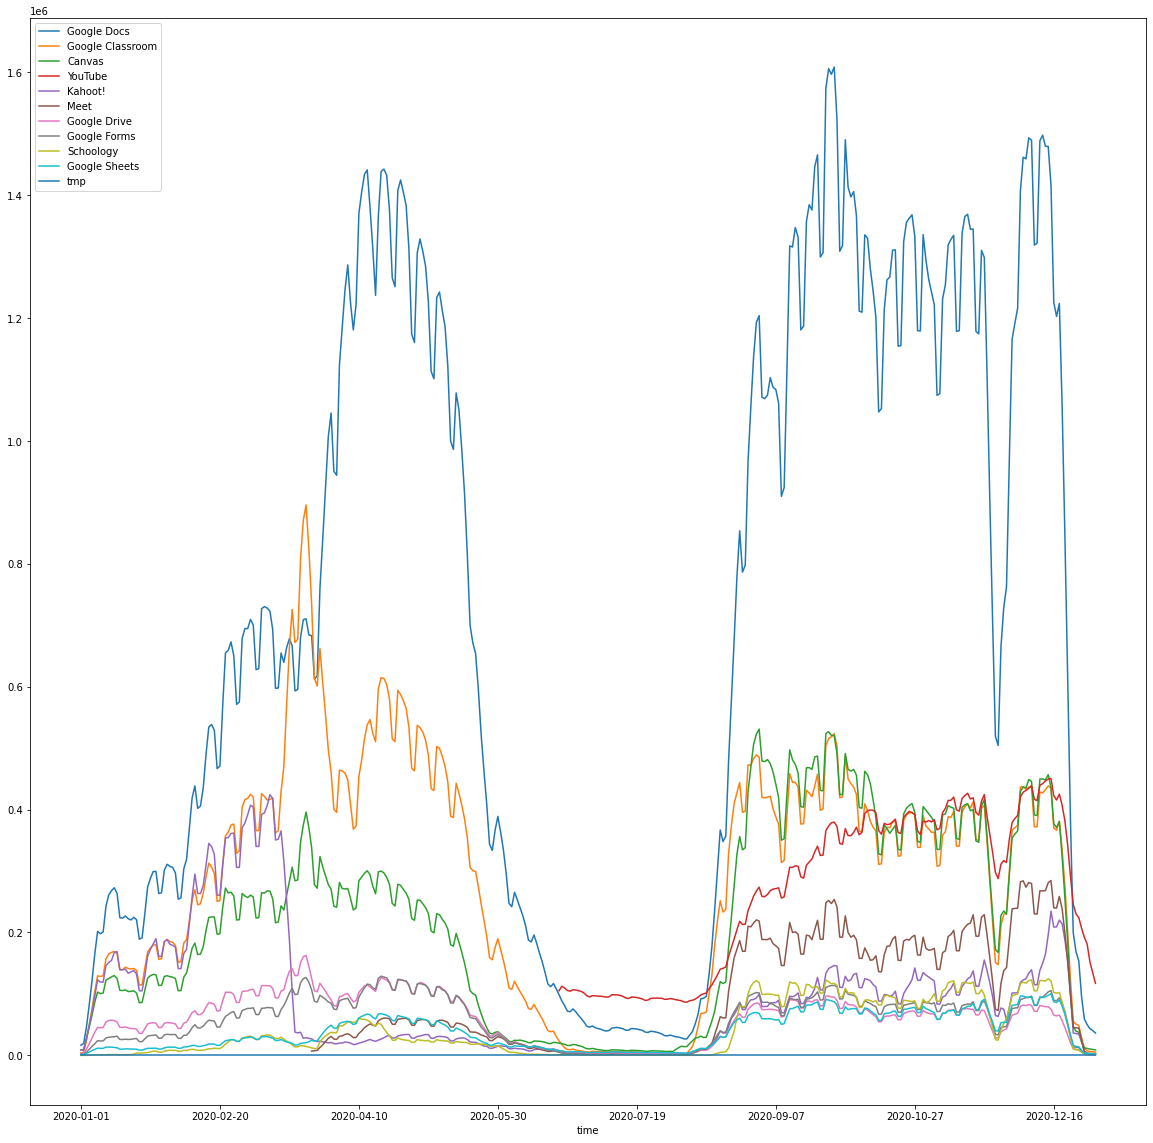

In [18]:
df.plot(figsize=(20, 20))